In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/BD PROJECT/agriculture-and-rural-development_rwa.csv')
df.head()


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Rwanda,RWA,2022,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,29.0564648375907
2,Rwanda,RWA,2021,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,23.9011825922422
3,Rwanda,RWA,2020,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,29.098048740326
4,Rwanda,RWA,2019,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,25.0389093959731


In [ ]:
print(df.shape)
df.info()
df.isnull().sum()


(1596, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1596 non-null   object
 1   Country ISO3    1596 non-null   object
 2   Year            1596 non-null   object
 3   Indicator Name  1596 non-null   object
 4   Indicator Code  1596 non-null   object
 5   Value           1596 non-null   object
dtypes: object(6)
memory usage: 74.9+ KB


,0
Country Name,0
Country ISO3,0
Year,0
Indicator Name,0
Indicator Code,0
Value,0


In [ ]:
# Numeric columns: fill missing with mean
num_cols = df.select_dtypes(include=['number']).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].mean())

# Categorical/text columns: fill with most common
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])


In [ ]:
for c in cat_cols:
    df[c] = df[c].str.strip().str.upper()  # clean whitespace and unify case


In [ ]:
for c in num_cols:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[c] >= Q1 - 1.5*IQR) & (df[c] <= Q3 + 1.5*IQR)]


In [ ]:
encoder = LabelEncoder()
for c in cat_cols:
    df[c] = encoder.fit_transform(df[c])


In [ ]:
from sklearn.preprocessing import StandardScaler

# First, re-identify numeric columns ONLY with float or int data
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Optional: print to verify
print("Numeric columns:", num_cols)

# Apply scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


Numeric columns: Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')


In [ ]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1596 non-null   float64
 1   Country ISO3    1596 non-null   float64
 2   Year            1596 non-null   float64
 3   Indicator Name  1596 non-null   float64
 4   Indicator Code  1596 non-null   float64
 5   Value           1596 non-null   float64
dtypes: float64(6)
memory usage: 74.9 KB


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,-39.937451,-39.937451,-2.024871,-1.869523,-1.656411,-1.701290
1,0.025039,0.025039,1.561030,0.261733,-1.563372,-0.031278
2,0.025039,0.025039,1.504111,0.261733,-1.563372,-0.313608
3,0.025039,0.025039,1.447192,0.261733,-1.563372,-0.028614
4,0.025039,0.025039,1.390273,0.261733,-1.563372,-0.228376


In [ ]:
# View column names
df.columns


Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [ ]:
# General summary of the data
df.describe()


,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
count,1.596000e+03,1.596000e+03,1.596000e+03,1.596000e+03,1596.000000,1.596000e+03
mean,-5.787629e-16,-5.787629e-16,-1.246566e-16,-1.424647e-16,0.000000,5.342427e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313,1.000313e+00
min,-3.993745e+01,-3.993745e+01,-2.024871e+00,-1.869523e+00,-1.656411,-1.701290e+00
25%,2.503915e-02,2.503915e-02,-8.295703e-01,-8.546391e-01,-1.005133,-9.108972e-01
50%,2.503915e-02,2.503915e-02,1.095942e-01,-1.442203e-01,0.018305,-1.724430e-01
75%,2.503915e-02,2.503915e-02,8.780015e-01,7.691752e-01,0.948703,8.430148e-01
max,2.503915e-02,2.503915e-02,1.617949e+00,1.784059e+00,1.693021,1.875785e+00


In [ ]:
# Step 1: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots for Jupyter/Colab
%matplotlib inline

# Step 2: Descriptive Statistics Summary
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)


Descriptive Statistics:
        Country Name  Country ISO3          Year  Indicator Name  \
count  1.596000e+03  1.596000e+03  1.596000e+03    1.596000e+03   
mean  -5.787629e-16 -5.787629e-16 -1.246566e-16   -1.424647e-16   
std    1.000313e+00  1.000313e+00  1.000313e+00    1.000313e+00   
min   -3.993745e+01 -3.993745e+01 -2.024871e+00   -1.869523e+00   
25%    2.503915e-02  2.503915e-02 -8.295703e-01   -8.546391e-01   
50%    2.503915e-02  2.503915e-02  1.095942e-01   -1.442203e-01   
75%    2.503915e-02  2.503915e-02  8.780015e-01    7.691752e-01   
max    2.503915e-02  2.503915e-02  1.617949e+00    1.784059e+00   

       Indicator Code         Value  
count     1596.000000  1.596000e+03  
mean         0.000000  5.342427e-17  
std          1.000313  1.000313e+00  
min         -1.656411 -1.701290e+00  
25%         -1.005133 -9.108972e-01  
50%          0.018305 -1.724430e-01  
75%          0.948703  8.430148e-01  
max          1.693021  1.875785e+00  


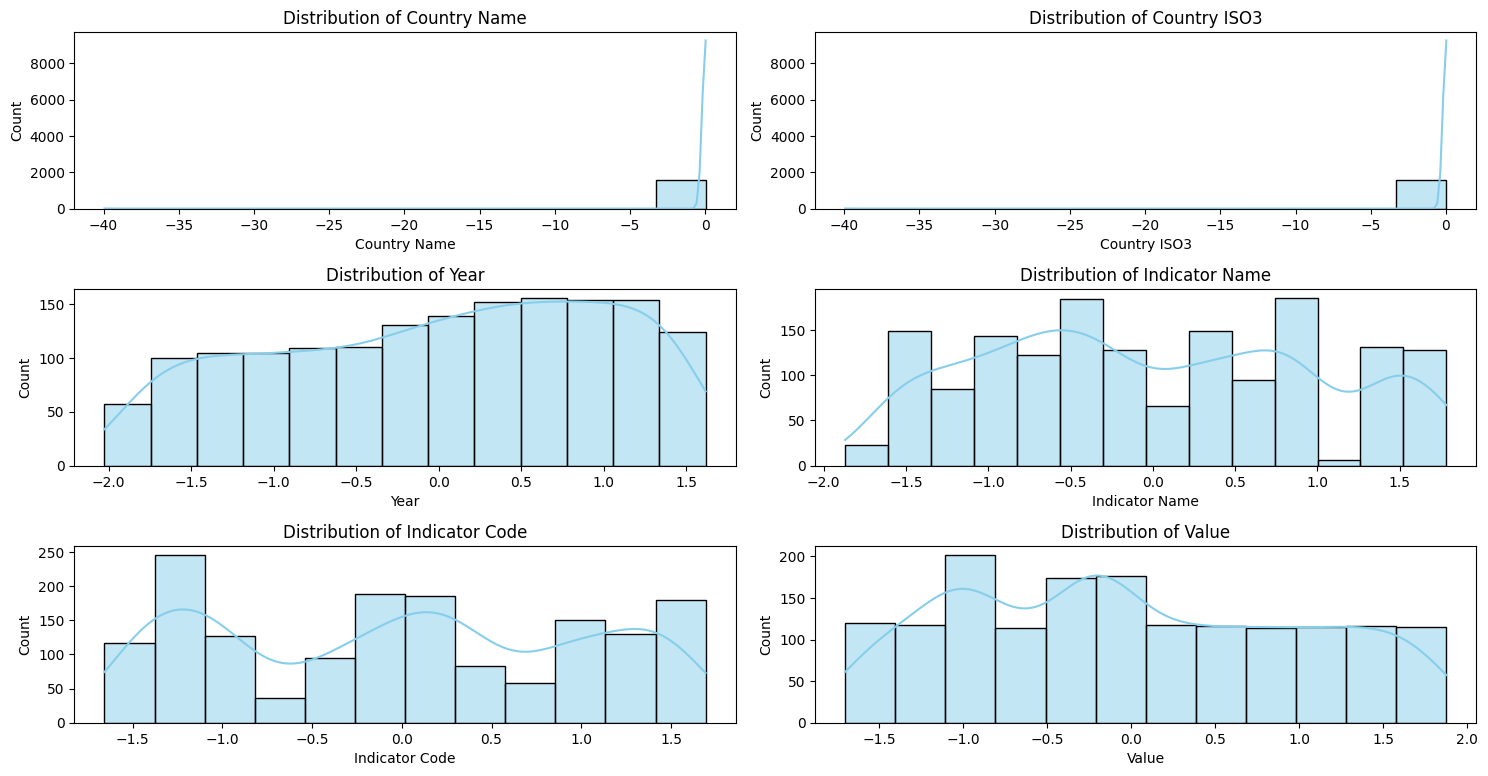

In [ ]:
# Plot distribution of all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 2 + 1, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

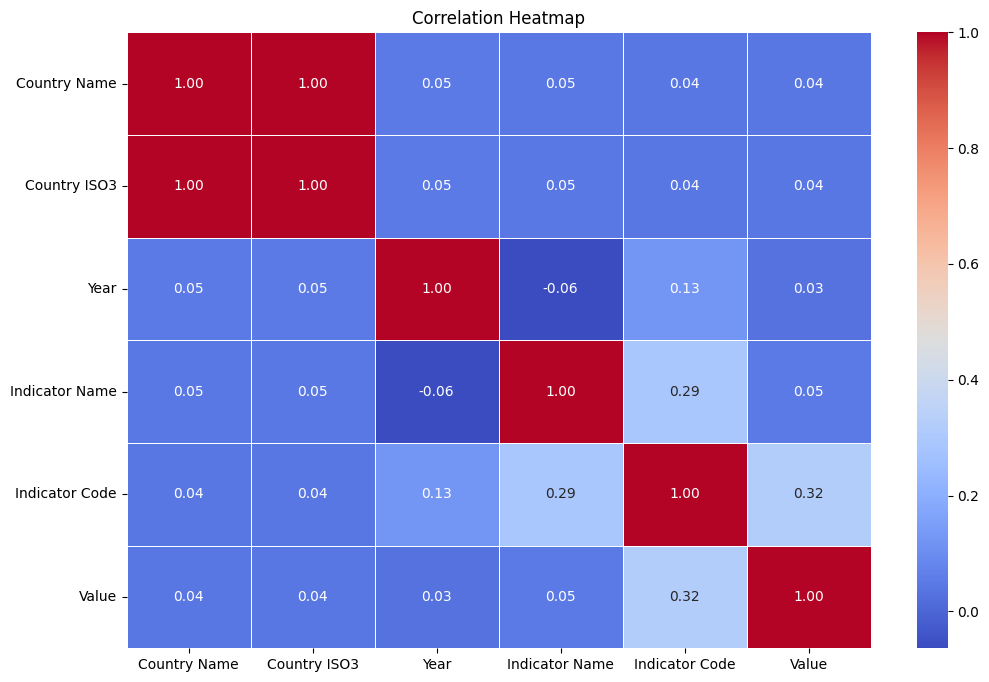

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


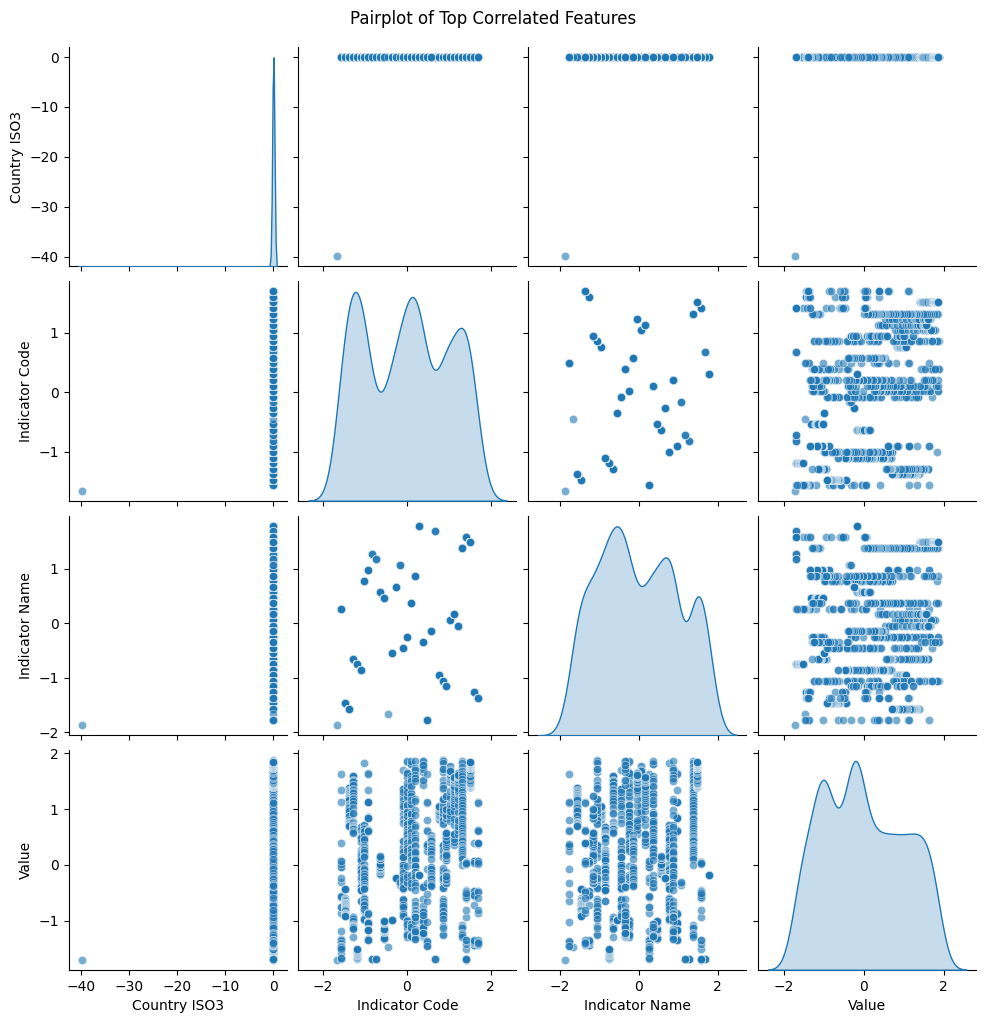

In [ ]:
# Select 4 most correlated numeric features with target-like column (example)
top_features = corr.abs().sum().sort_values(ascending=False)[1:5].index.tolist()

# Create pairplot
sns.pairplot(df[top_features], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Select only numeric columns for clustering
X = df.select_dtypes(include='number')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Try clustering into 3 groups (you can change this number)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters


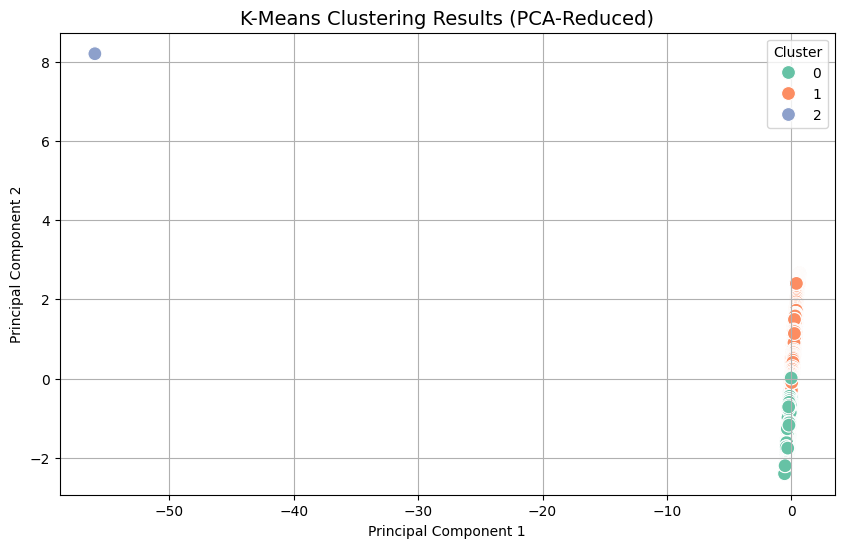

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('K-Means Clustering Results (PCA-Reduced)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score (ranges from -1 to 1, higher is better)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

# Inertia (within-cluster sum-of-squares)
print(f"Inertia: {kmeans.inertia_}")


Silhouette Score: 0.235
Inertia: 4786.274924199761
